In [1]:
#Uploading files
from google.colab import files
uploaded = files.upload()

Saving Tesla.csv - Tesla.csv.csv to Tesla.csv - Tesla.csv (1).csv


In [29]:
# Step 1: Import Libraries.
# We import the required Python libraries for data handling, visualization, and model building.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load dataset.
# Load Tesla stock price dataset and check its structure.
df = pd.read_csv("Tesla.csv")
print(df.head())
print(df.info())

        Date       Open   High        Low      Close    Volume  Adj Close
0  6/29/2010  19.000000  25.00  17.540001  23.889999  18766300  23.889999
1  6/30/2010  25.790001  30.42  23.299999  23.830000  17187100  23.830000
2   7/1/2010  25.000000  25.92  20.270000  21.959999   8218800  21.959999
3   7/2/2010  23.000000  23.10  18.709999  19.200001   5139800  19.200001
4   7/6/2010  20.000000  20.00  15.830000  16.110001   6866900  16.110001
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB
None


In [17]:
# Step 3: Select Feature
# We use the "Open" price as the target for next-day prediction.

data = df[['Open']].values

In [18]:
# Step 4: Scaling
# Neural networks perform better when inputs are scaled. We use MinMaxScaler.

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
data_scaled = scaler.fit_transform(data)

In [20]:
# Step 5: Create Sequences (Framing time series as supervised learning)
# We create input sequences (past 60 days) and output (next day).

def create_sequences(data, seq_length=60):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

X, y = create_sequences(data_scaled, 60)

In [22]:
# Step 6: Train-Test Split
# We split the data into 80% training and 20% testing.

split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [24]:
# Step 7: Build RNN Model (LSTM)
# LSTM is chosen because it handles long-term dependencies better than SimpleRNN.
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(50),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
# Step 8: Train Model
# We train the model with training data and validate using test data.

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

Epoch 1/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 9s 124ms/step - loss: 0.0456 - val_loss: 0.0030
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 0.0017 - val_loss: 0.0021
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - loss: 0.0014 - val_loss: 0.0026
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - loss: 0.0013 - val_loss: 0.0021
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 0.0012 - val_loss: 0.0023
Epoch 6/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0010 - val_loss: 0.0018
Epoch 7/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 9.8724e-04 - val_loss: 0.0017
Epoch 8/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - loss: 9.8110e-04 - val_loss: 0.0020
Epoch 9/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 8.4315e-04 - val_loss: 0.0014
Epoch 10/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 9.1639e-04 - val_loss: 0.0016
Epoch 11/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 7.6038e-04 - val_loss: 0.0014
Epoch 12/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 

In [28]:
# Step 9: Evaluate Model
# Use regression metrics (MAE, RMSE) to evaluate prediction performance.

y_pred = model.predict(X_test)

# Inverse scaling
y_test_inv = scaler.inverse_transform(y_test)
y_pred_inv = scaler.inverse_transform(y_pred)

mae = mean_absolute_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))

print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Mean Absolute Error: 8.552879418548116
Root Mean Squared Error: 10.411064237164524


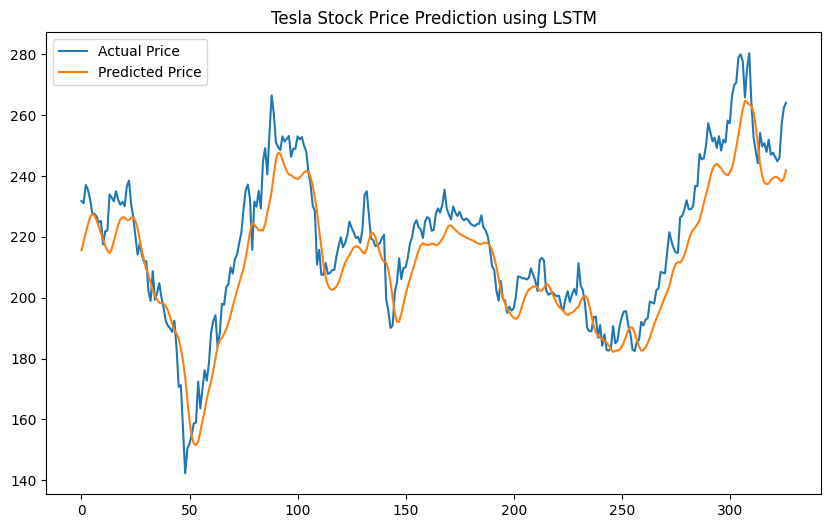

In [30]:
# Step 10: Visualization
# Compare actual vs predicted prices visually.

plt.figure(figsize=(10,6))
plt.plot(y_test_inv, label="Actual Price")
plt.plot(y_pred_inv, label="Predicted Price")
plt.legend()
plt.title("Tesla Stock Price Prediction using LSTM")
plt.show()